In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

In [3]:
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
data_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLI...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PIN...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5T...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [5]:
data_2015.shape

(3340, 47)

In [6]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
data_2016.shape

(3376, 46)

In [8]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

# I.Chargement des données

**Comparer les colonnes de données 2015 et 2016**

In [9]:
def compare_col(df1, df2):
    col_1 = data_2015.columns
    col_2 = data_2016.columns
    diff_1 = []
    diff_2 = []
    col_commun = []
    for col in col_1:
        if col in col_2:
            col_commun.append(col);
        else:
            diff_1.append(col)
    for col in col_2:
        if  col not in col_1:
            diff_2.append(col)
    return diff_1, diff_2, len(col_commun)

In [10]:
compare_col(data_2015, data_2016)

(['Location',
  'OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes'],
 ['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'],
 37)

In [11]:
data_2016['City'].unique() # variable à éliminer

array(['Seattle'], dtype=object)

In [12]:
data_2016['State'].unique() # variable à éliminer

array(['WA'], dtype=object)

In [13]:
data_2016.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [14]:
data_2015['Zip Codes'].unique() # Ne correspond pas aux ZipCode 2016

array([18081, 19576, 18379, 18800, 18383, 18789, 19579, 18390, 18377,
       18235, 18792, 18386, 17919, 19575, 19578, 19581, 19582, 17920,
       18385, 18388, 19584, 18798, 17916, 18795, 17923, 17926, 18229,
       18376, 18230], dtype=int64)

In [15]:
data_2016.Address.unique()

array(['405 Olive way', '724 Pine street', '1900 5th Avenue', ...,
       '1920 1st Ave W', '8319 8th Ave S', '2820 S Myrtle St'],
      dtype=object)

In [16]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

**Extraction les données de localisation de table 2015: Latitude, Longitude, Address, ZipCode**

In [17]:
data_2015['Location'].unique()

array(['{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       ...,
       '{\'latitude\': \'47.61649845\', \'longitude\': \'-122.33770787\', \'human_address\': \'{"address": "2030 8TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98121"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"address": "3801 NE 77TH ST", "city": "SEATTLE", "state": "WA", "zip": "98115"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"

In [18]:
print("La variable Location contient Latitude, Longitude, Adresse, ZipCode dans une colonne singulière.")

La variable Location contient Latitude, Longitude, Adresse, ZipCode dans une colonne singulière.


In [19]:
def get_latitude (row): # latitude
    lat= row #chaque ligne
    lat = lat.split(',')[0][lat.index(': ')+1:] # séparer par virgule
    lat=lat.replace("\'","").replace("\"","").replace(" ","") # supprimer les caractères spéciales
    print(lat)
    return lat

def get_longitude(row):
    long= row
    long = long.split(',')[1][long.index(': ')+2:]
    long=long.replace("\'","")
    print(long)
    return long

def get_address(row):
    add= row
    r= add.split(',')[2].rindex(":")
    add = add.split(',')[2][r+1 : ]
    add = add.replace("\"", "")
    print(add)
    return add

def get_zip(row):
    zip = row.split(',')[5][row.index(': ')-2:]
    zip = zip.replace("\"","").replace("}","").replace("\'","")
    print(zip)
    return zip

In [1]:
data_2015['Latitude'] = data_2015['Location'].apply(lambda row: get_latitude(row)).astype('float')
data_2015['Longitude'] = data_2015['Location'].apply(lambda row: get_longitude(row)).astype('float')
data_2015['Adresse'] = data_2015['Location'].apply(lambda row: get_address(row))
data_2015['Zip'] = data_2015['Location'].apply(lambda row: get_zip(row))

In [21]:
# Renommer les colonnes qui sont équivalents qu'en 2016
data_2015 = data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions', 'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity','Adresse':'Address', 
                                        'Zip':'ZipCode'})

In [22]:
compare_col(data_2015, data_2016)

(['Location',
  'OtherFuelUse(kBtu)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes'],
 ['City', 'State', 'Comments'],
 43)

**Première Suppression des variables**

In [23]:
print("Nous avons extrait les informations essentiels dans 'Location', 'Zip Code' de table 2015, nous pouvons donc les supprimer.")

Nous avons extrait les informations essentiels dans 'Location', 'Zip Code' de table 2015, nous pouvons donc les supprimer.


In [24]:
data_2015 = data_2015.drop(['OtherFuelUse(kBtu)', 'Comment','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas',
                            'City Council Districts', 'SPD Beats', 'Zip Codes', 'Location'], axis=1)

In [25]:
data_2016 = data_2016.drop(['City', 'State', 'Comments'], axis=1)

In [26]:
print("Ce sont des colonnes de table 2016 qui ne sont pas utiles pour la prédiction. ")

Ce sont des colonnes de table 2016 qui ne sont pas utiles pour la prédiction. 


In [27]:
# comparer de nouveau
compare_col(data_2015, data_2016)

([], [], 43)

**Regrouper les colonnes identiques dans un seul jeu de données**

In [28]:
data = pd.concat([data_2015, data_2016], axis=0).reset_index(drop=True)

In [29]:
data.shape

(6716, 43)

# II. Nettoyage de données

Valeurs manquantes

In [30]:
# valeurs manquantes
data.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
TaxParcelIdentificationNumber      0.000298
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.001191
NumberofFloors                     0.001191
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.020250
LargestPropertyUseType             0.023228
LargestPropertyUseTypeGFA          0.023228
SecondLargestPropertyUseType       0.517868
SecondLargestPropertyUseTypeGFA    0.517868
ThirdLargestPropertyUseType        0.827874
ThirdLargestPropertyUseTypeGFA     0.827874
YearsENERGYSTARCertified           0.965902
ENERGYSTARScore                 

In [31]:
data['Outlier'].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [32]:
print(" Suppression de Outlier (taux de manquante 97.5%), YearsENERGYSTARCertified (96.7%).")

 Suppression de Outlier (taux de manquante 97.5%), YearsENERGYSTARCertified (96.7%).


Deuxième suppression de variables

In [33]:
data.drop(['Outlier', 'YearsENERGYSTARCertified'], axis=1, inplace=True)

Doublons

In [34]:
# doublons
data.duplicated().sum() # pas de doublons

0

Valeurs abérrantes

In [35]:
# check les outliers
def outlr(x):

    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    iqr = q3 - q1

    fence_high = q3 + iqr*1.5
    fence_low = 0

    out_value = x.loc[(x > fence_high) | (x < fence_low)]
    print(fence_high)
    return out_value

In [36]:
# extraire les colonnes numériques
data_num = data.select_dtypes('number')

In [37]:
for x, y in data_num.iteritems():
        out_value = outlr(y)
        print(x + ' ' + 'avec' +' ' + str(out_value.size) + ' outliers')
        #print(out_value[0:5])
        print(len(out_value[out_value < 0])) # détecter les valeurs négatives
        print(out_value[out_value < 0])

34769.625
OSEBuildingID avec 445 outliers
0
Series([], Name: OSEBuildingID, dtype: int64)
2017.5
DataYear avec 0 outliers
0
Series([], Name: DataYear, dtype: int64)
13.0
CouncilDistrictCode avec 0 outliers
0
Series([], Name: CouncilDistrictCode, dtype: int64)
2068.0
YearBuilt avec 0 outliers
0
Series([], Name: YearBuilt, dtype: int64)
1.0
NumberofBuildings avec 120 outliers
0
Series([], Name: NumberofBuildings, dtype: float64)
9.5
NumberofFloors avec 472 outliers
0
Series([], Name: NumberofFloors, dtype: float64)
180847.625
PropertyGFATotal avec 739 outliers
0
Series([], Name: PropertyGFATotal, dtype: int64)
0.0
PropertyGFAParking avec 1428 outliers
2
2428   -3
3136   -2
Name: PropertyGFAParking, dtype: int64
161890.5
PropertyGFABuilding(s) avec 696 outliers
2
3139   -43310
3322   -50550
Name: PropertyGFABuilding(s), dtype: int64
147921.0
LargestPropertyUseTypeGFA avec 705 outliers
0
Series([], Name: LargestPropertyUseTypeGFA, dtype: float64)
58665.5
SecondLargestPropertyUseTypeGFA ave

In [38]:
print('Index des valeurs négatives:\nPropertyGFAParking:2428,3136\nPropertyGFABuilding(s):3139,3322')
print('SourceEUI(kBtu/sf):3246\nSourceEUIWN(kBtu/sf):3246,6546\nElectricity(kWh):6546\nTotalGHGEmissions:6546\nGHGEmissionsIntensity:6546')

Index des valeurs négatives:
PropertyGFAParking:2428,3136
PropertyGFABuilding(s):3139,3322
SourceEUI(kBtu/sf):3246
SourceEUIWN(kBtu/sf):3246,6546
Electricity(kWh):6546
TotalGHGEmissions:6546
GHGEmissionsIntensity:6546


In [39]:
data.drop(index=[2428,3206,3136,3139,3322,3246,6546], inplace=True) 
# supprime les 7 lignes des variables négatives

In [40]:
data.shape

(6709, 41)

# II. Exploration du jeu de données

In [41]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(k

In [42]:
# extraire les variables de type numérique une nouvelle fois
data_num = data.select_dtypes('number')

### Forme de distribution des variables quantitatives.

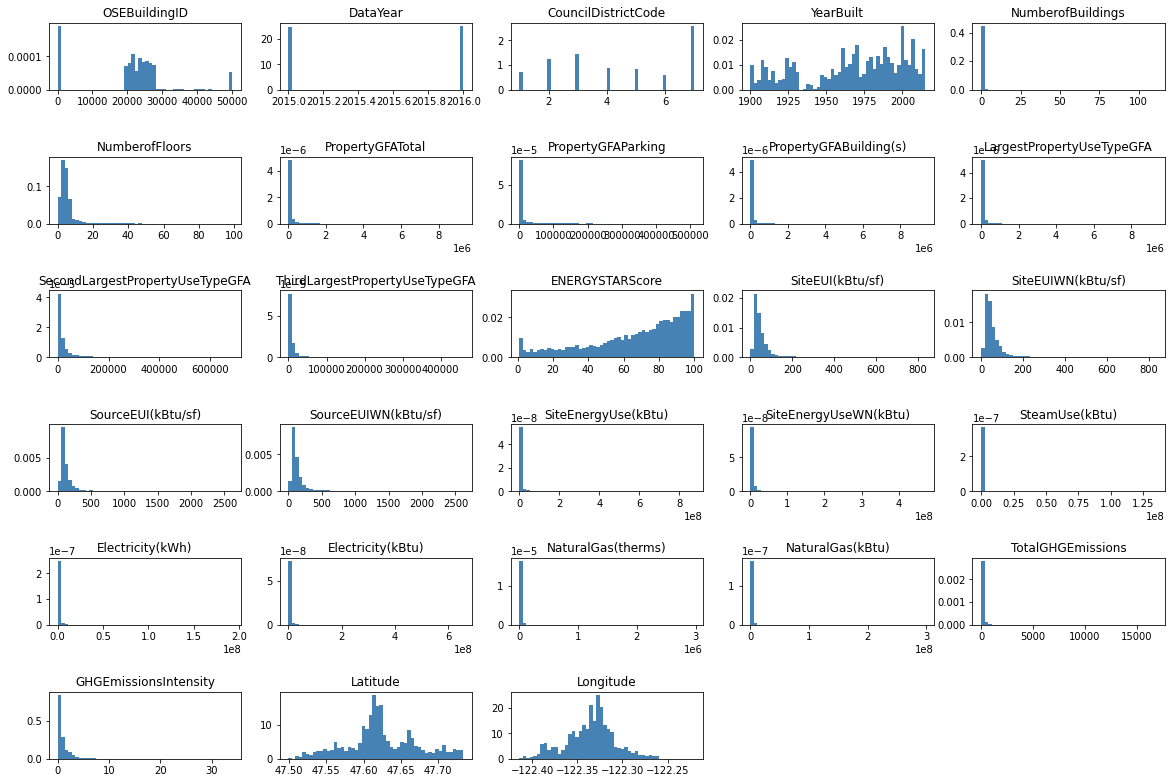

In [43]:
fig = plt.figure(figsize=(20,16))

for idx in range(data_num.shape[1]):
    #ax = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(7,5, (idx+1))
    h = ax.hist(data_num.iloc[:,idx], color = 'steelblue', bins=50, density = True, edgecolor= None)
    ax.set_title(data_num.columns[idx], fontsize = 12)
    plt.gcf().subplots_adjust(hspace=1)
plt.show()

Remarques

In [44]:
print("La majorité de variables compréssés à gauche. \nNon intérêt de présenter l\'ID ou l\'année extraction de données.")
print("Besoins de transformation log sur les varaibles non gaussiennes.")
print("Certaines variables non pertinentes reste à éliminer (Comment 99.6%, Outlier 97.5% etc.).")
print("Variable type int mais en effet de type qualitative: YearBuilt, CouncilDistrictCode, Zip Codes.")

La majorité de variables compréssés à gauche. 
Non intérêt de présenter l'ID ou l'année extraction de données.
Besoins de transformation log sur les varaibles non gaussiennes.
Certaines variables non pertinentes reste à éliminer (Comment 99.6%, Outlier 97.5% etc.).
Variable type int mais en effet de type qualitative: YearBuilt, CouncilDistrictCode, Zip Codes.


### Type de bâtiments

In [45]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

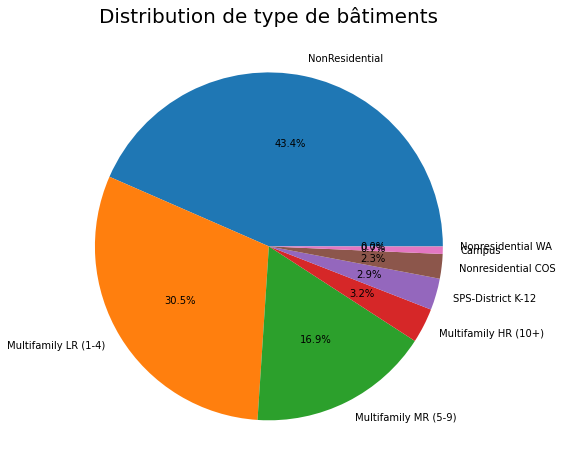

In [46]:
type = data['BuildingType'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(type, labels=type.index, autopct='%.1f%%')
plt.title('Distribution de type de bâtiments', fontsize=20)
plt.show()

Filtre les bâtiments type non-résidentiel

In [47]:
# nous sélectionnons les bâtiments du type non-résidentiel et enlever les lignes du type résidentiel
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [48]:
# enlève les caractères spéciales
import re
data['PrimaryPropertyType']=[re.compile(r'[\n\r\t]').sub("", item) for index, item in data['PrimaryPropertyType'].iteritems()]

In [49]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'SPS-District K-12',
       'Worship Facility', 'Supermarket/Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant',
       'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [50]:
data['PrimaryPropertyType']=[re.compile(r' / ').sub("/", item) for index, item in data['PrimaryPropertyType'].iteritems()]

In [51]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'SPS-District K-12',
       'Worship Facility', 'Supermarket/Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant',
       'University', 'Warehouse', 'Residence Hall', 'Office'],
      dtype=object)

In [52]:
# éliminer les lignes type 'Mid-Rise Multifamily', 'Low-Rise Multifamily', 'High-Rise Multifamily'
housing = ['Mid-Rise Multifamily', 'Low-Rise Multifamily', 'High-Rise Multifamily']
for house in housing :
    ind = data.loc[data['PrimaryPropertyType'] == house].index.values
    data.drop(ind, inplace=True)

In [53]:
data.shape

(3414, 41)

In [54]:
data.groupby(['BuildingType'])['PrimaryPropertyType'].value_counts()

BuildingType          PrimaryPropertyType        
Campus                Other                           14
                      K-12 School                      8
                      Mixed Use Property               7
                      University                       6
                      College/University               5
                      Large Office                     2
                      Restaurant                       2
Multifamily HR (10+)  Senior Care Community            6
                      Other                            2
                      Hotel                            1
Multifamily LR (1-4)  Senior Care Community           31
                      Mixed Use Property              23
                      Other                            8
                      Small- and Mid-Sized Office      2
                      College/University               1
                      University                       1
Multifamily MR (5-9)  Mixed Use Proper

### Type d'utilié primaire du bâtiment

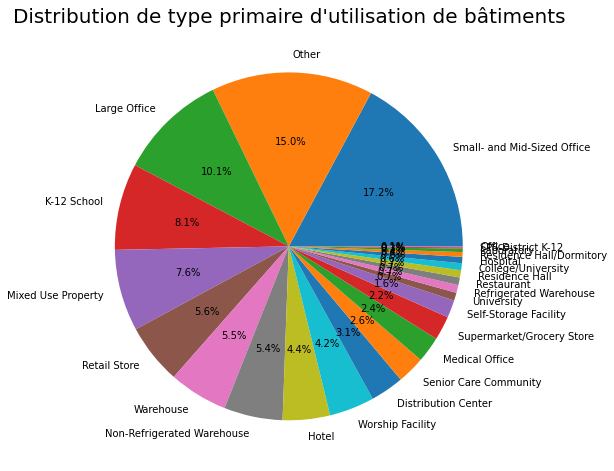

In [55]:
type = data['PrimaryPropertyType'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(type, labels=type.index, autopct='%.1f%%')
plt.title('Distribution de type primaire d\'utilisation de bâtiments', fontsize=20)
plt.show()

### L'âge du bâtiment

In [56]:
data['YearBuilt']= data['DataYear'] - data['YearBuilt']

In [57]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,88,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,47.612190,-122.337997,405 OLIVE WAY,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,19,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,47.613106,-122.333358,724 PINE ST,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,46,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,47.613349,-122.337699,1900 5TH AVE,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,89,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,47.614216,-122.336609,620 STEWART ST,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,35,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,47.613754,-122.340924,401 LENORA ST,98121


### Matrice de corrélation

In [58]:
data_num = data.select_dtypes('number')

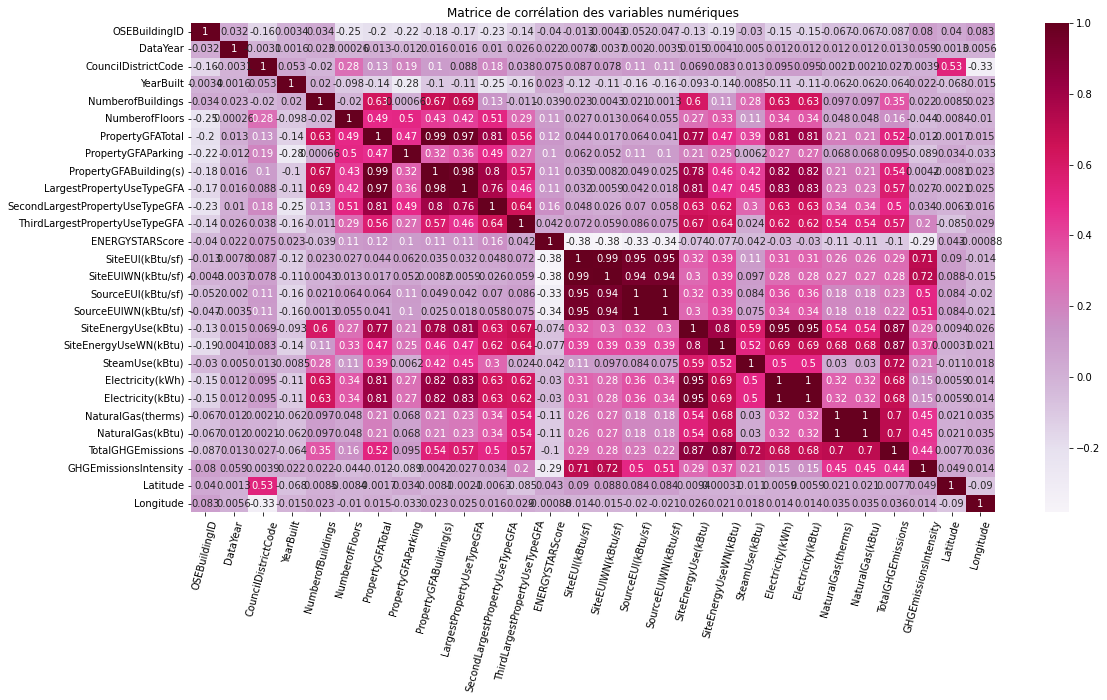

In [59]:
plt.figure(figsize=(18,9))

h= sns.heatmap(data=data_num.corr(), xticklabels=True, yticklabels=True, cmap='PuRd', annot=True)
h.set_title('Matrice de corrélation des variables numériques')
plt.xticks(rotation=75)
plt.show()

In [60]:
print('Forte corrélation:\n[SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)] 0.94~1')
print('[SiteEnergyUse(kBtu)] ~ [Electricity(kWh),Electricity(kBtu)] 0.95; ~[TotalGHGEmissions] 0.87')
print('[TotalGHGEmissions] ~ [NaturalGas(therms), NaturalGas(kBtu)] 0.7 ~[Electricity(kWh),Electricity(kBtu)] 0.68')

Forte corrélation:
[SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)] 0.94~1
[SiteEnergyUse(kBtu)] ~ [Electricity(kWh),Electricity(kBtu)] 0.95; ~[TotalGHGEmissions] 0.87
[TotalGHGEmissions] ~ [NaturalGas(therms), NaturalGas(kBtu)] 0.7 ~[Electricity(kWh),Electricity(kBtu)] 0.68


Retour aux variables catégoriels

In [61]:
data_cat = data.select_dtypes('object')

## Ingénierie des variables

In [62]:
# calcul le nombre de valeurs unique par variable catégoriels pour préparer One hot encoding
for col in data_cat.columns:
    len_col = len(data_cat[col].unique())
    print("{}".format(col) + ' ' + str(len_col))

BuildingType 8
PrimaryPropertyType 25
PropertyName 3296
TaxParcelIdentificationNumber 1891
Neighborhood 19
ListOfAllPropertyUseTypes 401
LargestPropertyUseType 58
SecondLargestPropertyUseType 49
ThirdLargestPropertyUseType 42
DefaultData 5
ComplianceStatus 4
Address 3341
ZipCode 77


In [63]:
data['ZipCode'].unique() #Car ZipCode est reconnu automatiquement comme objet, on a des doublons sur ses valeurs

array(['98101', '98121', '98104', '98118', '98105', '98112', '98125',
       '98109', '98103', '98199', '98115', '98107', '98144', '98119',
       '98122', '98126', '98133', '98146', '98106', '98108', '98134',
       '98117', '98136', '98116', '98177', '98102', '98155', '98178',
       98101.0, 98121.0, 98104.0, 98154.0, 98118.0, 98105.0, 98112.0,
       98125.0, 98109.0, 98070.0, 98108.0, 98199.0, 98115.0, 98107.0,
       98144.0, 98103.0, 98119.0, 98136.0, 98122.0, 98126.0, 98133.0,
       98146.0, 98033.0, 98106.0, 98111.0, 98134.0, 98117.0, 98116.0,
       98191.0, 98164.0, 98195.0, 98185.0, 98181.0, 98102.0, 98168.0,
       98155.0, 98006.0, 98124.0, 98053.0, 98013.0, 98178.0, 98114.0,
       98165.0, 98011.0, 98113.0, 98177.0, 98020.0, 98145.0, nan],
      dtype=object)

In [64]:
data['ZipCode'] = data['ZipCode'].astype('float')

In [65]:
print(len(data['ZipCode'].unique()))

49


In [66]:
data['ZipCode'].unique() 

array([98101., 98121., 98104., 98118., 98105., 98112., 98125., 98109.,
       98103., 98199., 98115., 98107., 98144., 98119., 98122., 98126.,
       98133., 98146., 98106., 98108., 98134., 98117., 98136., 98116.,
       98177., 98102., 98155., 98178., 98154., 98070., 98033., 98111.,
       98191., 98164., 98195., 98185., 98181., 98168., 98006., 98124.,
       98053., 98013., 98114., 98165., 98011., 98113., 98020., 98145.,
          nan])

In [67]:
data['ZipCode'].dtypes

dtype('float64')

In [68]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus', 'Latitude', 'Longitude', 'Address',
       'ZipCode'],
      dtype='object')

In [2]:
# filtre les zipcodes des laquelles leur nombres de batiments supérieurs à 20, les autre classés en 'others'
result_distrib = data.groupby('ZipCode')['OSEBuildingID'].count().sort_values(ascending=False)


In [70]:
zipcode_others = result_distrib[result_distrib.values < 40].index

In [3]:
index_others = []
for code in zipcode_others:
    for el in data['ZipCode']:
        if el == code:
        #re.sub('el','00000.0', el)
            data['ZipCode'][data['ZipCode'] == el] = 00000.0
            

In [72]:
data['ZipCode'].unique()

array([98101., 98121., 98104., 98118., 98105., 98112., 98125., 98109.,
       98103., 98199., 98115., 98107., 98144., 98119., 98122., 98126.,
       98133.,     0., 98106., 98108., 98134., 98117., 98116., 98102.,
          nan])

Troisième suppression de variables

In [73]:
print("Parmi toutes les variables catégoriels, PropertyName, IdentificationNumber, Adresse ont une grande nombre de valeurs uniques,\net elles ne sont pas très utiles pour la prédiction.\npour cela nous allons les supprimer.")

Parmi toutes les variables catégoriels, PropertyName, IdentificationNumber, Adresse ont une grande nombre de valeurs uniques,
et elles ne sont pas très utiles pour la prédiction.
pour cela nous allons les supprimer.


In [74]:
data.drop(columns=['PropertyName','TaxParcelIdentificationNumber','Address'], axis=1, inplace=True)

In [75]:
data.shape

(3414, 38)

One hot encoding

In [76]:
print('Prepare Encoding target: PrimaryPropertyType, Neighborhood, Zipcodes, BuildingType')

Prepare Encoding target: PrimaryPropertyType, Neighborhood, Zipcodes, BuildingType


In [77]:
def update(row, e_dict):
    returned_category=""
    if pd.notnull(row) :
        for key in e_dict:
            if row in e_dict[key]:
                returned_category= key
                break
    return returned_category


def clean_column (df) :
    propertyType_dict= {"Health" : ['Medical Office', 'Hospital' 'Senior Care Community', 'Laboratory'], 
                    "Eductaion" : ['College/University', 'K-12 School' ], 
                    "Storage" : ['Self-Storage Facility', 'Refrigerated Warehouse', 'Non-Refrigerated Warehouse', 
                                 'Self-Storage Facility\n', 'Distribution Center',  'Retail Store', 
                                 'Distribution Center\n',  'Worship Facility' ], 
                    "Office" : ['Small- and Mid-Sized Office',  'Large Office'], 
                    "Other" : ['Other', 'Mixed Use Property' , 'Low-Rise Multifamily', 'Supermarket/Grocery Store'], 
                  "Hotel": ['Hotel', 'Residence Hall/Dormitory'],
                   "Restaurant":['Restaurant\n', 'Restaurant']} 

    neighborhood_dict = {"North" : ['NORTHEAST', 'NORTHWEST', 'NORTH' , 'BALLARD'], 
                    "South" : ['SOUTHWEST', 'SOUTHEAST', 'DOWNTOWN', 'DELRIDGE'], 
                    "East" : ['MAGNOLIA / QUEEN ANNE', 'EAST'],
                    "Center" : ['LAKE UNION' , 'CENTRAL'],
                    "West" : [ 'GREATER DUWAMISH' ]} 

    df['PrimaryPropertyType']= df['PrimaryPropertyType'].apply (lambda row :  update(row, propertyType_dict))   
    df['Neighborhood']= df['Neighborhood'].apply (lambda row :  update(row, neighborhood_dict))

In [78]:
clean_column(data)

In [79]:
len(data['PrimaryPropertyType'].unique())

8

In [80]:
len(data['Neighborhood'].unique())

6

In [81]:
print("OneHotCoding avec get_dummies.")

OneHotCoding avec get_dummies.


In [82]:
data = pd.get_dummies(data, columns=['PrimaryPropertyType', 'Neighborhood','ZipCode'], prefix=None)

In [83]:
data.head()

,OSEBuildingID,DataYear,BuildingType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,PrimaryPropertyType_,PrimaryPropertyType_Eductaion,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Storage,Neighborhood_,Neighborhood_Center,Neighborhood_East,Neighborhood_North,Neighborhood_South,Neighborhood_West,ZipCode_0.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98144.0,ZipCode_98199.0
0,1,2015,NonResidential,7,88,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,47.612190,-122.337997,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2015,NonResidential,7,19,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,47.613106,-122.333358,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2015,NonResidential,7,46,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,47.613349,-122.337699,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2015,NonResidential,7,89,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,47.614216,-122.336609,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,2015,NonResidential,7,35,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,47.613754,-122.340924,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
data_pre = data.select_dtypes('number')
data_pre.drop(columns=['OSEBuildingID','DataYear'], axis=1, inplace=True)

In [85]:
print("La consommation d\'énergie et l\'émission de gaz CO2 sont liée de façon directe à effet de serre, les données normalisée en fonction de climatique n\'ont pas l\'intérêt pour nous.\nOn supprime donc les consommations WN.")

La consommation d'énergie et l'émission de gaz CO2 sont liée de façon directe à effet de serre, les données normalisée en fonction de climatique n'ont pas l'intérêt pour nous.
On supprime donc les consommations WN.


In [86]:
data_pre.drop(columns=['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'],axis=1, inplace=True)
data_pre.drop(columns=['Electricity(kWh)','NaturalGas(therms)'], axis=1, inplace=True)

In [87]:
data_pre.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,PrimaryPropertyType_,PrimaryPropertyType_Eductaion,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Storage,Neighborhood_,Neighborhood_Center,Neighborhood_East,Neighborhood_North,Neighborhood_South,Neighborhood_West,ZipCode_0.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98144.0,ZipCode_98199.0
0,7,88,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,249.43,2.64,47.612190,-122.337997,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,19,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,263.51,2.38,47.613106,-122.333358,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,46,1.0,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,96.6,242.7,73130656.0,19660404.0,49762435.0,3709900.0,2061.48,1.92,47.613349,-122.337699,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,89,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.4,636.3,28229320.0,23458518.0,2769023.0,2001894.0,1936.34,31.38,47.614216,-122.336609,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,35,1.0,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,120.1,228.8,14829099.0,0.0,6066245.0,8763105.0,507.70,4.02,47.613754,-122.340924,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Transformation de log sur les variables à prédire

In [5]:
data_pre[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']]= data_pre[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']].apply(np.log2)

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

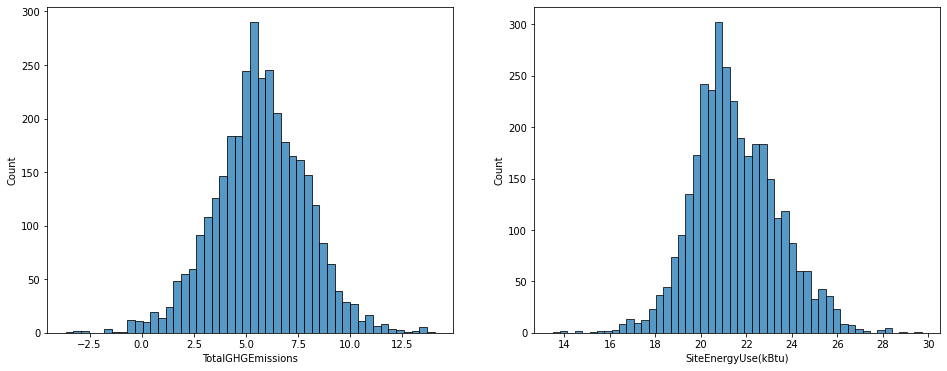

In [89]:
# regardons la distribution des deux variables après la transformation log
fig, ax = plt.subplots(ncols=2, figsize = (16,6))
sns.histplot(data_pre['TotalGHGEmissions'], ax=ax[0])
sns.histplot(data_pre['SiteEnergyUse(kBtu)'], ax=ax[1])

In [90]:
data_pre.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,PrimaryPropertyType_,PrimaryPropertyType_Eductaion,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Storage,Neighborhood_,Neighborhood_Center,Neighborhood_East,Neighborhood_North,Neighborhood_South,Neighborhood_West,ZipCode_0.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98144.0,ZipCode_98199.0
0,7,88,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.9,173.5,22.735091,2023032.0,3686160.0,1272388.0,7.962491,2.64,47.612190,-122.337997,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,19,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.4,191.3,22.994076,0.0,3905411.0,4448985.0,8.041714,2.38,47.613106,-122.333358,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,46,1.0,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,96.6,242.7,26.123973,19660404.0,49762435.0,3709900.0,11.009465,1.92,47.613349,-122.337699,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,89,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.4,636.3,24.750691,23458518.0,2769023.0,2001894.0,10.919117,31.38,47.614216,-122.336609,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,35,1.0,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,120.1,228.8,23.821928,0.0,6066245.0,8763105.0,8.987832,4.02,47.613754,-122.340924,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='GHGEmissionsIntensity'>

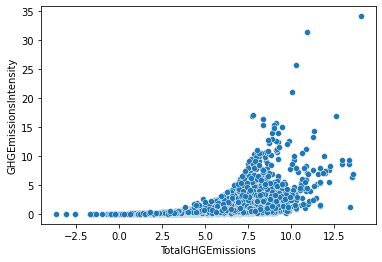

In [91]:
sns.scatterplot(data=data_pre, x='TotalGHGEmissions', y='GHGEmissionsIntensity')

Transformation les variables d'énergie en porata

In [8]:
data_pre['SteamUse(kBtu)_percentage'] = data_pre['SteamUse(kBtu)'] / (data_pre['SteamUse(kBtu)'] + data_pre['Electricity(kBtu)'] + data_pre['NaturalGas(kBtu)'])
data_pre['Electricity(kBtu)_percentage'] = data_pre['Electricity(kBtu)'] / (data_pre['SteamUse(kBtu)'] + data_pre['Electricity(kBtu)'] + data_pre['NaturalGas(kBtu)'])
data_pre['NaturalGas(kBtu)_percentage'] = data_pre['NaturalGas(kBtu)'] / (data_pre['SteamUse(kBtu)'] + data_pre['Electricity(kBtu)'] + data_pre['NaturalGas(kBtu)'])

Transformation en pourcentage la pondération de surface

In [9]:
cols_gfa = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
for col in cols_gfa:
    data_pre[col+'_rate'] = data_pre[col]/data_pre['PropertyGFABuilding(s)'] # transformation en pourcentage effectue sur la même colonne

In [94]:
data_pre.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,PrimaryPropertyType_,PrimaryPropertyType_Eductaion,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Storage,Neighborhood_,Neighborhood_Center,Neighborhood_East,Neighborhood_North,Neighborhood_South,Neighborhood_West,ZipCode_0.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98144.0,ZipCode_98199.0,SteamUse(kBtu)_percentage,Electricity(kBtu)_percentage,NaturalGas(kBtu)_percentage,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate
0,7,88,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.9,173.5,22.735091,2023032.0,3686160.0,1272388.0,7.962491,2.64,47.612190,-122.337997,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.289767,0.527984,0.182249,1.000000,NaN,NaN
1,7,19,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.4,191.3,22.994076,0.0,3905411.0,4448985.0,8.041714,2.38,47.613106,-122.333358,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.467468,0.532532,0.947775,0.170211,0.052225
2,7,46,1.0,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,96.6,242.7,26.123973,19660404.0,49762435.0,3709900.0,11.009465,1.92,47.613349,-122.337699,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.268832,0.680440,0.050728,0.787163,0.103951,0.000000
3,7,89,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.4,636.3,24.750691,23458518.0,2769023.0,2001894.0,10.919117,31.38,47.614216,-122.336609,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.830995,0.098090,0.070915,1.000000,NaN,NaN
4,7,35,1.0,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,120.1,228.8,23.821928,0.0,6066245.0,8763105.0,8.987832,4.02,47.613754,-122.340924,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.409070,0.590930,1.149074,0.633054,0.000000


4 ème suppression de variables inutiles ou trop de valeurs 0

In [10]:
data_pre.drop(columns=["PrimaryPropertyType_","ThirdLargestPropertyUseTypeGFA","Neighborhood_"], axis=1, inplace=True)

Transformation en pourcentage les variables d'énergie par source

In [96]:
print("Si on transforme les consommations de différents source d\'énergie en pourcentage, on augmente les liens parmi ces variables.")
print("Est-ce que c'est utile d'en calculer en terme d'augmenter la performance du modèle?")

Si on transforme les consommations de différents source d'énergie en pourcentage, on augmente les liens parmi ces variables.
Est-ce que c'est utile d'en calculer en terme d'augmenter la performance du modèle?


In [97]:
dict_col = {}
i = 0
for col in data_pre.columns:
  dict_col[col] = i
  i = i + 1
print(dict_col)

{'CouncilDistrictCode': 0, 'YearBuilt': 1, 'NumberofBuildings': 2, 'NumberofFloors': 3, 'PropertyGFATotal': 4, 'PropertyGFAParking': 5, 'PropertyGFABuilding(s)': 6, 'LargestPropertyUseTypeGFA': 7, 'SecondLargestPropertyUseTypeGFA': 8, 'ENERGYSTARScore': 9, 'SiteEUI(kBtu/sf)': 10, 'SourceEUI(kBtu/sf)': 11, 'SiteEnergyUse(kBtu)': 12, 'SteamUse(kBtu)': 13, 'Electricity(kBtu)': 14, 'NaturalGas(kBtu)': 15, 'TotalGHGEmissions': 16, 'GHGEmissionsIntensity': 17, 'Latitude': 18, 'Longitude': 19, 'PrimaryPropertyType_Eductaion': 20, 'PrimaryPropertyType_Health': 21, 'PrimaryPropertyType_Hotel': 22, 'PrimaryPropertyType_Office': 23, 'PrimaryPropertyType_Other': 24, 'PrimaryPropertyType_Restaurant': 25, 'PrimaryPropertyType_Storage': 26, 'Neighborhood_Center': 27, 'Neighborhood_East': 28, 'Neighborhood_North': 29, 'Neighborhood_South': 30, 'Neighborhood_West': 31, 'ZipCode_0.0': 32, 'ZipCode_98101.0': 33, 'ZipCode_98102.0': 34, 'ZipCode_98103.0': 35, 'ZipCode_98104.0': 36, 'ZipCode_98105.0': 37, '

In [98]:
print("Emplacement variable EmissionCO2 :[TotalGHGEmissions] 15")
print("Emplacement variable Consommation totale d\'énergie: [SiteEnergyUse(kBtu)] 11")
print("Emplacement variable EnergyStar score: [ENERGYSTARScore] 8 ")

Emplacement variable EmissionCO2 :[TotalGHGEmissions] 15
Emplacement variable Consommation totale d'énergie: [SiteEnergyUse(kBtu)] 11
Emplacement variable EnergyStar score: [ENERGYSTARScore] 8 


In [99]:
data_pre.to_csv('clean_building_data.csv')

In [100]:
data_pre.shape

(3414, 62)

In [101]:
data_pre.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,PrimaryPropertyType_Eductaion,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Storage,Neighborhood_Center,Neighborhood_East,Neighborhood_North,Neighborhood_South,Neighborhood_West,ZipCode_0.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98144.0,ZipCode_98199.0,SteamUse(kBtu)_percentage,Electricity(kBtu)_percentage,NaturalGas(kBtu)_percentage,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate
0,7,88,1.0,12.0,88434,0,88434,88434.0,NaN,65.0,78.9,173.5,22.735091,2023032.0,3686160.0,1272388.0,7.962491,2.64,47.612190,-122.337997,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.289767,0.527984,0.182249,1.000000,NaN,NaN
1,7,19,1.0,11.0,103566,15064,88502,83880.0,15064.0,51.0,94.4,191.3,22.994076,0.0,3905411.0,4448985.0,8.041714,2.38,47.613106,-122.333358,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.467468,0.532532,0.947775,0.170211,0.052225
2,7,46,1.0,41.0,961990,0,961990,757243.0,100000.0,18.0,96.6,242.7,26.123973,19660404.0,49762435.0,3709900.0,11.009465,1.92,47.613349,-122.337699,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.268832,0.680440,0.050728,0.787163,0.103951,0.000000
3,7,89,1.0,10.0,61320,0,61320,61320.0,NaN,1.0,460.4,636.3,24.750691,23458518.0,2769023.0,2001894.0,10.919117,31.38,47.614216,-122.336609,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.830995,0.098090,0.070915,1.000000,NaN,NaN
4,7,35,1.0,18.0,119890,12460,107430,123445.0,68009.0,67.0,120.1,228.8,23.821928,0.0,6066245.0,8763105.0,8.987832,4.02,47.613754,-122.340924,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.409070,0.590930,1.149074,0.633054,0.000000
